In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def mesh(a, b, Nt):
    ht = (b-a) / Nt        
    return ht

def Euler(f, t, w, ht):
    for i in range(0,Nt):
        w[i+1] = w[i] + ht * f(t[i], w[i])

def RK2(f, t, w, ht):
    for i in range(0,Nt):
        k1 = ht * f(t[i], w[i])
        w[i+1] = w[i] + ht * f(t[i] + ht * 0.5, w[i] + k1 * 0.5)

def RK3(f, t, w, ht):
    for i in range(0,Nt):
        k1 = ht * f(t[i], w[i])
        k2 = ht * f(t[i] + ht/3, w[i] + k1 / 3)
        k3 = ht * f(t[i] + 2 * ht / 3, w[i] + 2 * k2 / 3)
        w[i+1] = w[i] + (k1 + 3 * k3) / 4

def RK4(f, t, w, ht):
    for i in range(0,Nt):
        k1 = ht * f(t[i], w[i])
        k2 = ht * f(t[i] + ht/2, w[i] + k1 / 2)
        k3 = ht * f(t[i] + ht/2, w[i] + k2 / 2)
        k4 = ht * f(t[i] + ht, w[i] + k3)        
        w[i+1] = w[i] + (k1 + 2*k2 + 2*k3 + k4) / 6

def f(t,y):
    return y - t**2 + 1

def Exacta(t):
    return (t+1)**2 - 0.5 * np.exp(t)

In [13]:
Nt = 4 # 4, 8, 16, 32
a = 0
b = 4
ht = mesh(a, b, Nt)
y0 = 0.5

t  = np.linspace(a, b, Nt+1)
y_eul = np.zeros(Nt+1)
y_rk2 = np.zeros(Nt+1)
y_rk3 = np.zeros(Nt+1)
y_rk4 = np.zeros(Nt+1)

y_eul[0] = y0
y_rk2[0] = y0
y_rk3[0] = y0
y_rk4[0] = y0

Euler(f, t, y_eul, ht)
RK2(f, t, y_rk2, ht)
RK3(f, t, y_rk3, ht)
RK4(f, t, y_rk4, ht)

yp = Exacta(t)
e_eul = np.abs(yp - y_eul)
e_rk2 = np.abs(yp - y_rk2)
e_rk3 = np.abs(yp - y_rk3)
e_rk4 = np.abs(yp - y_rk4)

n_error_eul = np.linalg.norm(e_eul, 2)
n_error_rk2 = np.linalg.norm(e_rk2, 2)
n_error_rk3 = np.linalg.norm(e_rk3, 2)
n_error_rk4 = np.linalg.norm(e_rk4, 2)

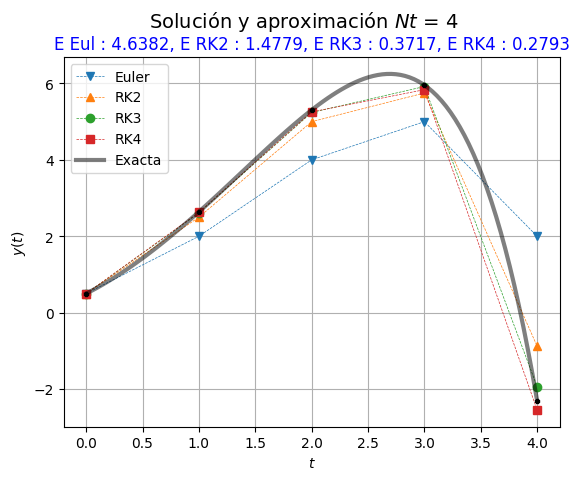

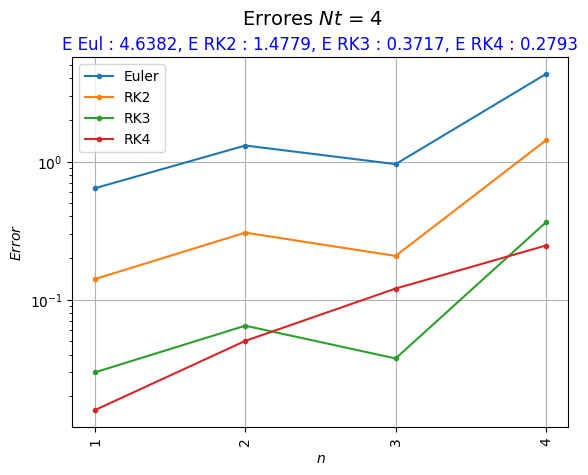

In [14]:
plt.yscale('linear')
plt.plot(t,y_eul,'C0v--', lw=0.5, label="Euler")
plt.plot(t,y_rk2,'C1^--', lw=0.5, label="RK2")
plt.plot(t,y_rk3,'C2o--', lw=0.5, label="RK3")
plt.plot(t,y_rk4,'C3s--', lw=0.5, label="RK4")

t1 = np.linspace(a,b,100)
y = Exacta(t1)

plt.plot(t1, y, 'k-', lw=3, label="Exacta", alpha=0.5)
plt.scatter(t, yp, marker='P', s=10, c='k', zorder=5, alpha=1.0)
titulo = 'E Eul : {:5.4f}'.format(n_error_eul) + ', ' + \
         'E RK2 : {:5.4f}'.format(n_error_rk2) + ', ' + \
         'E RK3 : {:5.4f}'.format(n_error_rk3) + ', ' + \
         'E RK4 : {:5.4f}'.format(n_error_rk4)
plt.suptitle('Solución y aproximación $Nt$ = {}'.format(Nt), fontsize = 14)
plt.title(titulo, fontsize=12, color='blue')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.grid()
plt.legend()
plt.savefig('Metodos_{}.pdf'.format(Nt))
plt.show()

nl = np.arange(1,Nt+1,1)
plt.plot(nl, e_eul[1:],'C0.-', label='Euler')
plt.plot(nl, e_rk2[1:],'C1.-', label='RK2')
plt.plot(nl, e_rk3[1:],'C2.-', label='RK3')
plt.plot(nl, e_rk4[1:],'C3.-', label='RK4')
plt.suptitle('Errores $Nt$ = {}'.format(Nt), fontsize = 14)
plt.title(titulo, fontsize=12, color='blue')
plt.yscale('log')
plt.xticks(nl, rotation=90)
plt.grid()
plt.xlabel('$n$')
plt.ylabel('$Error$')
plt.legend()
plt.savefig('MetodosError_{}.pdf'.format(Nt))
plt.show()


In [22]:
from pandas import DataFrame

tabla = DataFrame(np.array([t, yp, y_eul, y_rk2, y_rk3, y_rk4, e_eul, e_rk2, e_rk3, e_rk4]).T,
                  columns=['$t_i$','$y$ (exacta)','$y$ (Euler)','$y$ (RK2)','$y$ (RK3)','$y$ (RK4)','E. Euler','E. RK2','E. RK3', 'E. RK4'])
tabla.to_csv('tabla.csv')
tabla

,$t_i$,$y$ (exacta),$y$ (Euler),$y$ (RK2),$y$ (RK3),$y$ (RK4),E. Euler,E. RK2,E. RK3,E. RK4
0,0.0,0.500000,0.5,0.500,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
1,1.0,2.640859,2.0,2.500,2.611111,2.625000,0.640859,0.140859,0.029748,0.015859
2,2.0,5.305472,4.0,5.000,5.240741,5.255208,1.305472,0.305472,0.064731,0.050264
3,3.0,5.957232,5.0,5.750,5.919753,5.837023,0.957232,0.207232,0.037478,0.120209
4,4.0,-2.299075,2.0,-0.875,-1.936214,-2.545564,4.299075,1.424075,0.362861,0.246489
